In [1]:
from deap import creator, base, tools, algorithms

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [25]:
toolbox = base.Toolbox()
n = 4
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("EstrIndividuo", list, fitness=creator.FitnessMin)

toolbox.register("Genes", np.random.permutation, n)
toolbox.register("Individuos", tools.initIterate, creator.EstrIndividuo, toolbox.Genes)

c:\Users\cesar\AppData\Local\Programs\Python\Python312\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
c:\Users\cesar\AppData\Local\Programs\Python\Python312\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'EstrIndividuo' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [26]:
toolbox.register("Populacao",tools.initRepeat, list, toolbox.Individuos)

In [27]:
pop = toolbox.Populacao(n=10)

In [28]:
toolbox.register("mate", tools.cxPartialyMatched)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.1)
toolbox.register("select", tools.selTournament, tournsize=2)

In [42]:
dist = [[0,7,9,2], [4,0,3,7], [6,7,0,8], [2,3,8,0]]

In [43]:
def aptidao(individuo):
    f = 0
    for i in range(n-1):
        local1 = individuo[i]
        local2 = individuo[i+1]
        distancia = dist[local1][local2]
        f = f + distancia
    return f,

In [44]:
toolbox.register("evaluate", aptidao)

In [45]:
def estatisticaSalvar(individuo):
  return individuo.fitness.values

In [46]:
estatistica = tools.Statistics(estatisticaSalvar)
estatistica.register("mean", np.mean)
estatistica.register("max", np.max)
estatistica.register("min", np.min)

In [47]:
hof = tools.HallOfFame(1)

In [48]:
result, log = algorithms.eaSimple(pop, toolbox, cxpb=0.8, mutpb=0.1, ngen=30, stats=estatistica, halloffame=hof, verbose=True)

gen	nevals	mean	max	min
0  	0     	11.5	16 	11 
1  	8     	11.5	16 	11 
2  	10    	11  	11 	11 
3  	6     	11  	11 	11 
4  	8     	11  	11 	11 
5  	8     	11  	11 	11 
6  	10    	11.2	13 	11 
7  	8     	12  	21 	11 
8  	8     	12.2	21 	11 
9  	8     	11.2	13 	11 
10 	10    	11  	11 	11 
11 	10    	11  	11 	11 
12 	6     	11  	11 	11 
13 	8     	11  	11 	11 
14 	6     	11  	11 	11 
15 	7     	12.2	21 	11 
16 	8     	13  	21 	11 
17 	8     	11  	11 	11 
18 	8     	11  	11 	11 
19 	8     	11  	11 	11 
20 	8     	11.2	13 	11 
21 	10    	11.2	13 	11 
22 	10    	11  	11 	11 
23 	5     	12  	21 	11 
24 	10    	11  	11 	11 
25 	8     	11  	11 	11 
26 	10    	12.2	21 	11 
27 	6     	11  	11 	11 
28 	10    	11  	11 	11 
29 	6     	11  	11 	11 
30 	8     	11  	11 	11 


In [49]:
print(result)

[[1, 2, 0, 3], [1, 2, 0, 3], [1, 2, 0, 3], [1, 2, 0, 3], [1, 2, 0, 3], [1, 2, 0, 3], [1, 2, 0, 3], [1, 2, 0, 3], [1, 2, 0, 3], [1, 2, 0, 3]]


In [50]:
print(hof)

[[1, 2, 0, 3]]


In [51]:
melhor = hof[0]
print(aptidao(melhor))

(11,)


In [52]:
log

[{'gen': 0, 'nevals': 0, 'mean': 11.5, 'max': 16.0, 'min': 11.0},
 {'gen': 1, 'nevals': 8, 'mean': 11.5, 'max': 16.0, 'min': 11.0},
 {'gen': 2, 'nevals': 10, 'mean': 11.0, 'max': 11.0, 'min': 11.0},
 {'gen': 3, 'nevals': 6, 'mean': 11.0, 'max': 11.0, 'min': 11.0},
 {'gen': 4, 'nevals': 8, 'mean': 11.0, 'max': 11.0, 'min': 11.0},
 {'gen': 5, 'nevals': 8, 'mean': 11.0, 'max': 11.0, 'min': 11.0},
 {'gen': 6, 'nevals': 10, 'mean': 11.2, 'max': 13.0, 'min': 11.0},
 {'gen': 7, 'nevals': 8, 'mean': 12.0, 'max': 21.0, 'min': 11.0},
 {'gen': 8, 'nevals': 8, 'mean': 12.2, 'max': 21.0, 'min': 11.0},
 {'gen': 9, 'nevals': 8, 'mean': 11.2, 'max': 13.0, 'min': 11.0},
 {'gen': 10, 'nevals': 10, 'mean': 11.0, 'max': 11.0, 'min': 11.0},
 {'gen': 11, 'nevals': 10, 'mean': 11.0, 'max': 11.0, 'min': 11.0},
 {'gen': 12, 'nevals': 6, 'mean': 11.0, 'max': 11.0, 'min': 11.0},
 {'gen': 13, 'nevals': 8, 'mean': 11.0, 'max': 11.0, 'min': 11.0},
 {'gen': 14, 'nevals': 6, 'mean': 11.0, 'max': 11.0, 'min': 11.0},
 

In [53]:
menores = log.select("min")
maiores = log.select("max")
medias = log.select("mean")

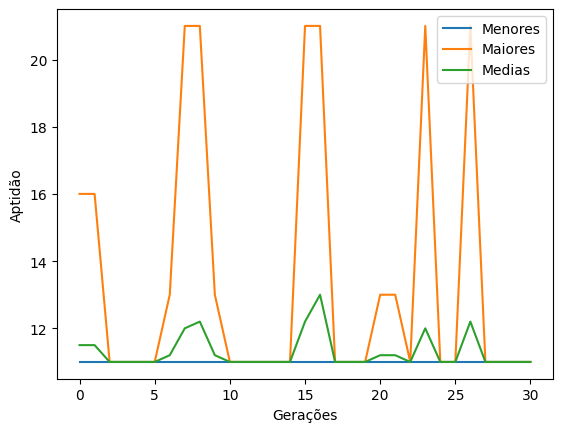

In [55]:
plt.plot(menores, label="Menores")
plt.plot(maiores, label="Maiores")
plt.plot(medias, label="Medias")
plt.xlabel("Gerações")
plt.ylabel("Aptidão")
plt.legend(loc=1)